# Lending Club Case Study

In [1725]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('max_columns', None)
import re #regular expression

In [1726]:
#read files
df = pd.read_csv('../data/loan.csv', low_memory=False)

In [1727]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [1728]:
#shape of data
df.shape

(39717, 111)

In [1729]:
#view  data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [1730]:
#null values percentage
df.isnull().sum()*100/len(df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [1731]:
#remove 90% above null columns
df=df.dropna(thresh=df.shape[0]*0.9,how='all',axis=1)

## Data cleaning

In [1732]:
# data cleaning for int_rate
df['int_rate']=df['int_rate'].apply(lambda x:x.replace('%','')).astype(float)


In [1733]:
#remove months in terms
df['term']=df['term'].apply(lambda x: x.replace('months',''))

In [1734]:
#remove current loan
df=df[(df['loan_status']!="Current")]

In [1735]:
#replacing 1 with charged off and 0 with Fully Paid
df['default']=df['loan_status'].apply(lambda x: 1 if x=="Charged Off" else 0)

In [1736]:
# dropping N/A value in employement length as there is no corelation with other attributes
df =df[~(df['emp_length'].isna())]

In [1737]:
def remove_year(x):
    value = re.sub("y.*", "", x).strip()
    if(value=="10+"):
        return 11
    elif (value=='< 1'):
        return 0
    else :
        return value

In [1738]:
# replace year or years and convert column as int
df['emp_length']=df['emp_length'].apply(remove_year).astype(int)

In [1739]:
#shape after removing unwanted columns
df.shape

(37544, 54)

In [1740]:
#glance at final data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37544 non-null  int64  
 1   member_id                   37544 non-null  int64  
 2   loan_amnt                   37544 non-null  int64  
 3   funded_amnt                 37544 non-null  int64  
 4   funded_amnt_inv             37544 non-null  float64
 5   term                        37544 non-null  object 
 6   int_rate                    37544 non-null  float64
 7   installment                 37544 non-null  float64
 8   grade                       37544 non-null  object 
 9   sub_grade                   37544 non-null  object 
 10  emp_title                   36136 non-null  object 
 11  emp_length                  37544 non-null  int64  
 12  home_ownership              37544 non-null  object 
 13  annual_inc                  375

In [1741]:
# Final data set
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,default
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,11,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,11,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,11,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,0


# Univariate Analysis

In [1743]:
#create pivot table function
def create_pivot_table(df,index,ids,columns,aggfunc):
    temp_df= pd.DataFrame(pd.pivot_table(df,index=index, values=ids, columns=columns,aggfunc=aggfunc))
    temp_df['default%'] = temp_df[1]/(temp_df[1]+temp_df[0])*100
    temp_df['paid%'] = temp_df[0]/(temp_df[1]+temp_df[0])*100
    temp_df['total']=temp_df[1]+temp_df[0]
    temp_df=temp_df.reset_index()
    temp_df=temp_df.sort_values('default%',ascending=False)
    return temp_df


In [1745]:
#plot sns combo bar graph function
def comboplot_bar(df,xs,ys,xlabel,ylabel,title,height=12,width=8):
    fig, ax1 = plt.subplots(figsize=(height,width))
    color = 'tab:blue'
    ax1.set_title(title, fontsize=16)
    ax2 = sns.barplot(x=xs, y='total', data = df,palette="summer")
    ax2.set_xlabel(xlabel, fontsize=16)
    ax2.set_ylabel(ylabel, fontsize=16)
    ax1.tick_params(axis='y')
    ax2 = ax1.twinx()
    color = 'tab:red'    
    ax3 = sns.lineplot(x=xs, y=ys, data = df, sort=False, color=color)
    ax3.set_ylabel('Default %', fontsize=16, color=color)
    ax3.tick_params(axis='y', color=color)
    
     # label points on the plot
    for x, y in zip(df[xs], df[ys]):
        label = "{:.1f}".format(y)+"%"
        plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(5,5),
                ha='center')
    
    
    plt.show()

### Pivot table for Term wrt loan_status

In [1746]:
#pivot table for default_loan wrt term
term_pvttable=create_pivot_table(df,["term"],"id", ["default"],'count')
term_pvttable

default,term,0,1,default%,paid%,total
1,60,6931,2326,25.126931,74.873069,9257
0,36,25214,3073,10.863648,89.136352,28287


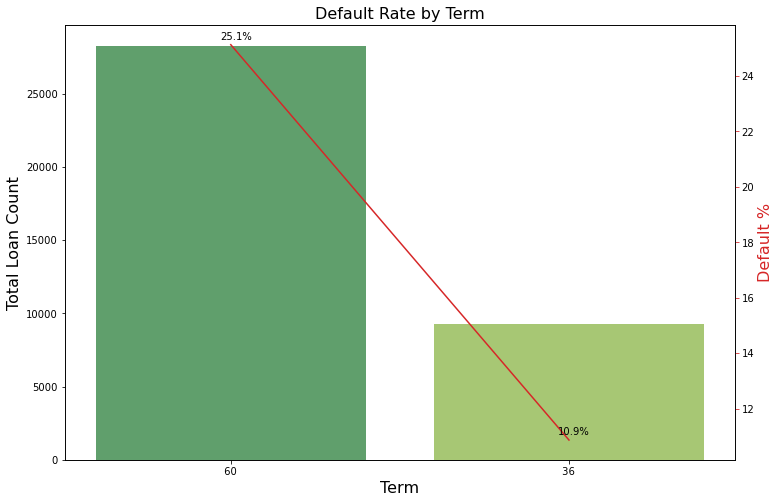

In [1748]:
comboplot_bar(term_pvttable,'term','default%',"Term","Total Loan Count","Default Rate by Term")
#                 df,xs,ys,xlabel,ylabel,title,height=12,width=8

## Pivot table for Grade wrt loan status

In [1749]:
#pivot table for default_loan wrt term
grade_pvttable=create_pivot_table(df,["grade"],"id", ["default"],'count')
grade_pvttable

default,grade,0,1,default%,paid%,total
6,G,198,100,33.557047,66.442953,298
5,F,646,313,32.638165,67.361835,959
4,E,1920,700,26.717557,73.282443,2620
3,D,3894,1085,21.791524,78.208476,4979
2,C,6381,1288,16.794889,83.205111,7669
1,B,10004,1355,11.928867,88.071133,11359
0,A,9102,558,5.776398,94.223602,9660


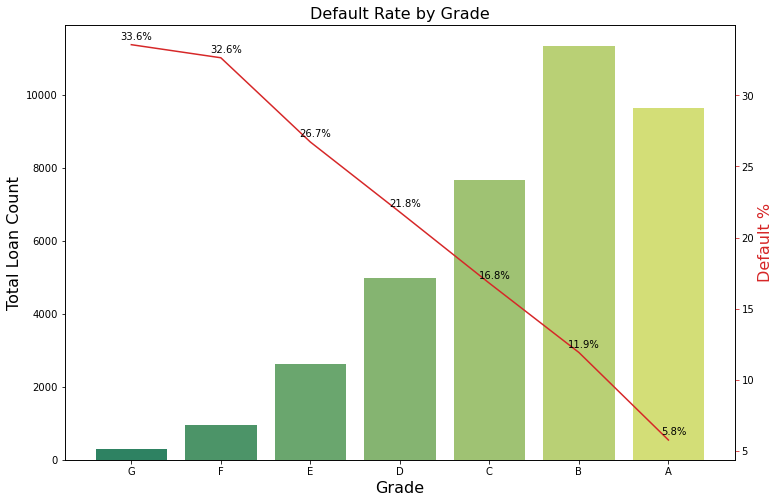

In [1752]:
comboplot_bar(grade_pvttable,'grade','default%',"Grade","Total Loan Count","Default Rate by Grade")

## Pivot table for purpose wrt loan status

In [1753]:
#pivot table for default_loan wrt term
purpose_pvttable=create_pivot_table(df,["purpose"],"id", ["default"],'count')
purpose_pvttable

default,purpose,0,1,default%,paid%,total
11,small_business,1248,462,27.017544,72.982456,1710
10,renewable_energy,76,18,19.148936,80.851064,94
5,house,295,59,16.666667,83.333333,354
3,educational,265,52,16.403785,83.596215,317
9,other,3117,596,16.051710,83.948290,3713
7,medical,555,101,15.396341,84.603659,656
8,moving,468,84,15.217391,84.782609,552
2,debt_consolidation,14996,2679,15.157001,84.842999,17675
12,vacation,298,50,14.367816,85.632184,348
4,home_improvement,2455,330,11.849192,88.150808,2785


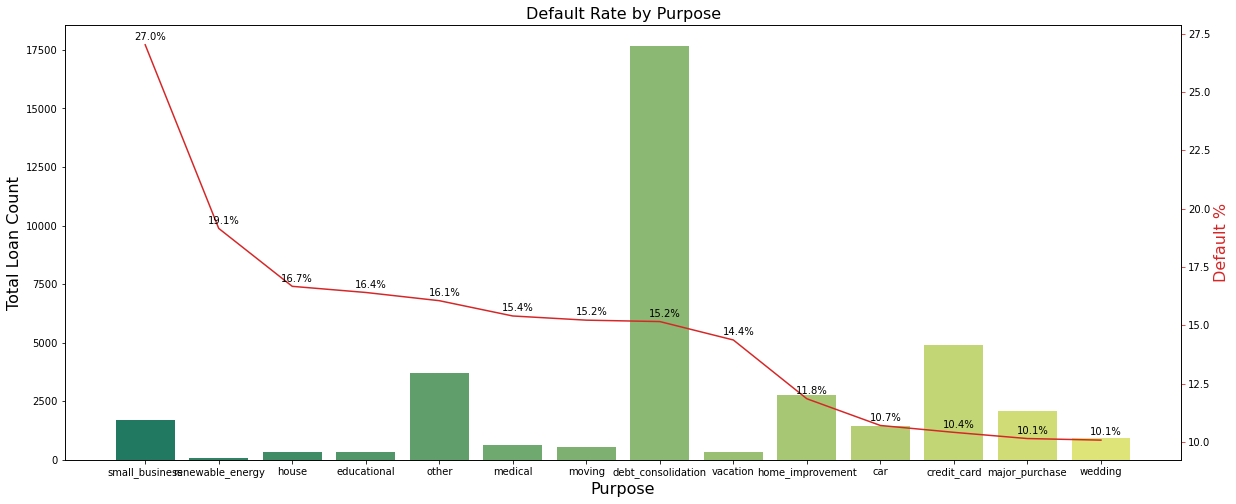

In [1886]:
comboplot_bar(purpose_pvttable,'purpose','default%',"Purpose","Total Loan Count","Default Rate by Purpose",20,8)

## Pivot table for home ownership wrt loan status

In [1756]:
#pivot table for default_loan wrt term
home_ownership_pvttable=create_pivot_table(df,["home_ownership"],"id", ["default"],'count')
#removing None as its insignificant
home_ownership_pvttable=home_ownership_pvttable[(home_ownership_pvttable.home_ownership!="NONE")] 
home_ownership_pvttable

default,home_ownership,0,1,default%,paid%,total
2,OTHER,80.0,18.0,18.367347,81.632653,98.0
4,RENT,15342.0,2736.0,15.134418,84.865582,18078.0
3,OWN,2370.0,400.0,14.440433,85.559567,2770.0
0,MORTGAGE,14350.0,2245.0,13.528171,86.471829,16595.0


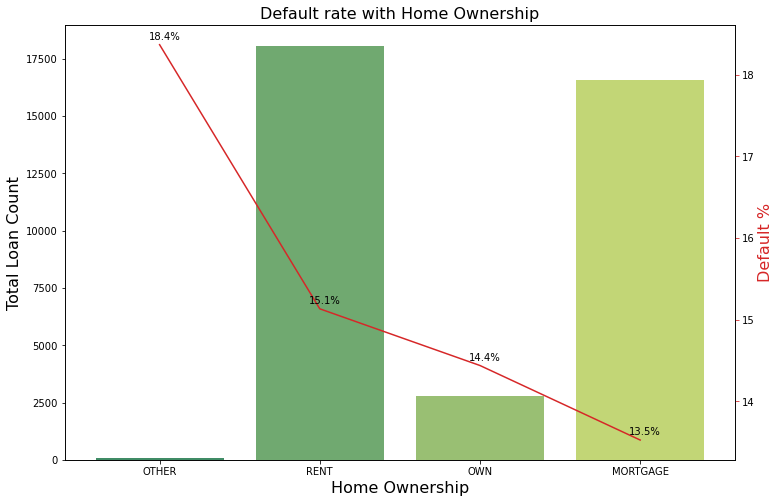

In [1758]:
comboplot_bar(home_ownership_pvttable,'home_ownership','default%',"Home Ownership","Total Loan Count","Default rate with Home Ownership")

## Pivot table for verification status wrt loan status

In [1759]:
#pivot table for default_loan wrt term
verification_status_pvttable=create_pivot_table(df,["verification_status"],"id", ["default"],'count')
verification_status_pvttable

default,verification_status,0,1,default%,paid%,total
2,Verified,9818,1954,16.598709,83.401291,11772
1,Source Verified,8098,1396,14.704024,85.295976,9494
0,Not Verified,14229,2049,12.587541,87.412459,16278


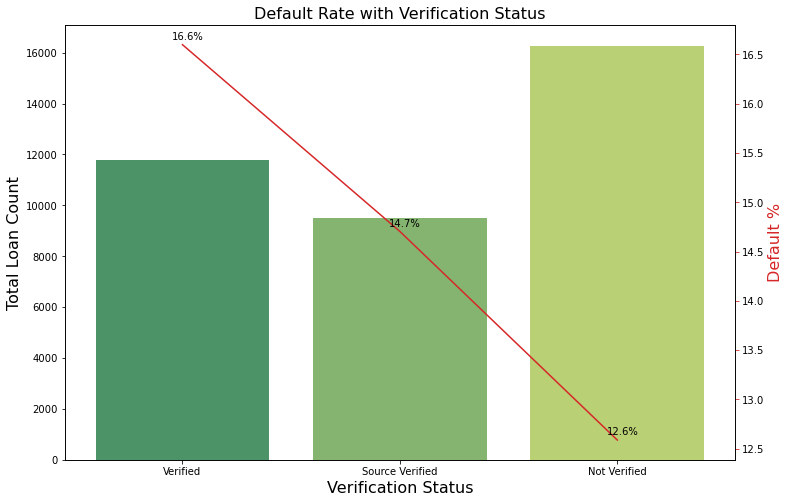

In [1761]:
comboplot_bar(verification_status_pvttable,'verification_status','default%',"Verification Status","Total Loan Count","Default Rate with Verification Status")



### Analysis of Catagorical Data with Default Rate

#### Loan Amount Bucket with respect to default rate

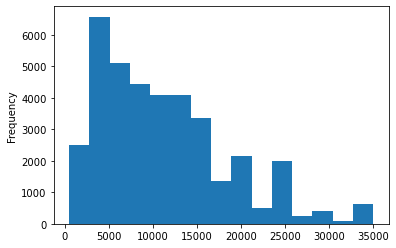

In [1762]:
##Create histogram to see loan amount distribution
df.loan_amnt.plot.hist(bins=15)
plt.show()

In [1763]:
#function to create bucket list for loan amount
def loan_amount_bucket(amount):
    if amount in range (1,5000):
        return "Less than 5000"
    elif amount in range (5000,10000):
        return "Between 5000 and 10000"
    elif amount in range (10000,15000):
        return "Between 10000 and 15000"
    else:
        return "Greater than 15000"

In [1830]:
#creating bucket for loan amount
df['loan_amnt_bucket']=df['loan_amnt'].apply(loan_amount_bucket)
df[['loan_amnt_bucket','loan_amnt']].head()

,loan_amnt_bucket,loan_amnt
0,Between 5000 and 10000,5000
1,Less than 5000,2500
2,Less than 5000,2400
3,Between 10000 and 15000,10000
5,Between 5000 and 10000,5000


In [1832]:
#pivot table for loan amount bins wrt Default
loan_amnt_bucket_pvttable=create_pivot_table(df,["loan_amnt_bucket"],"id", ["default"],'count')
loan_amnt_bucket_pvttable

default,loan_amnt_bucket,0,1,default%,paid%,total
2,Greater than 15000,8455,1837,17.848815,82.151185,10292
3,Less than 5000,6150,945,13.319239,86.680761,7095
0,Between 10000 and 15000,7371,1119,13.180212,86.819788,8490
1,Between 5000 and 10000,10169,1498,12.839633,87.160367,11667


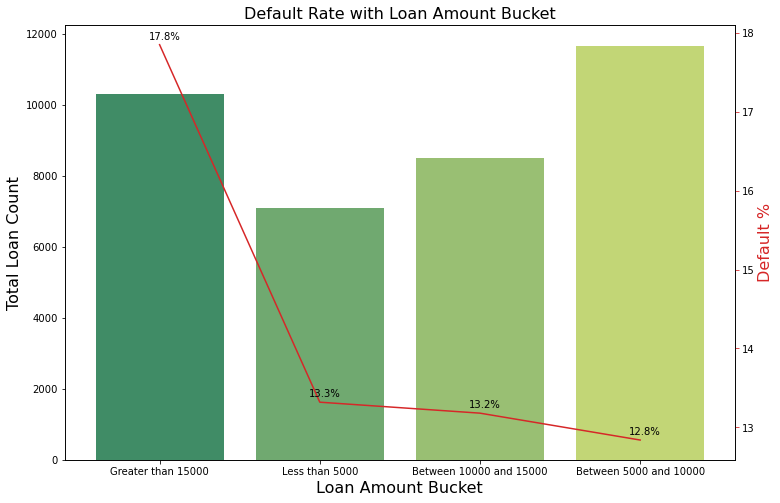

In [1835]:
# plot the graph
comboplot_bar(loan_amnt_bucket_pvttable,'loan_amnt_bucket','default%',"Loan Amount Bucket","Total Loan Count","Default Rate with Loan Amount Bucket")


### Interest Rate Bucket with respect to Default Rate

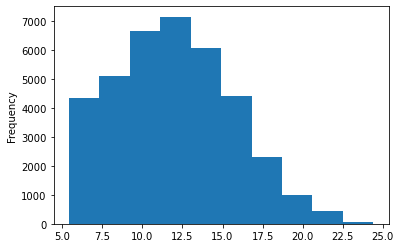

In [1765]:
df.int_rate.plot.hist()
plt.show()

In [1766]:
#function to create bucket list for rate interest
def int_rate_bucket(int_rate):
    if int_rate<7.5:
        return "Less than 7.5%"
    elif 7.5<=int_rate<10:
        return "Between 7.5% and 10%"
    elif 10<= int_rate <12.5:
        return "Between 10% and 12.5%"
    elif 12.5<= int_rate<15:
        return "Between 12.5% and 15%"
    else:
        return "Greater than 15%"

In [1825]:
#creating bucket for interest rate
df['int_rate_bucket']=df['int_rate'].apply(int_rate_bucket)
df[['int_rate_bucket','int_rate']].head()

,int_rate_bucket,int_rate
0,Between 10% and 12.5%,10.65
1,Greater than 15%,15.27
2,Greater than 15%,15.96
3,Between 12.5% and 15%,13.49
5,Between 7.5% and 10%,7.90


In [1836]:
#pivot table for interest rate bins wrt Default
int_rate_bucket_pvttable=create_pivot_table(df,["int_rate_bucket"],"id", ["default"],'count')
int_rate_bucket_pvttable

default,int_rate_bucket,0,1,default%,paid%,total
3,Greater than 15%,5795,2035,25.989783,74.010217,7830
1,Between 12.5% and 15%,7297,1417,16.261189,83.738811,8714
0,Between 10% and 12.5%,8197,1212,12.881284,87.118716,9409
2,Between 7.5% and 10%,5977,504,7.776578,92.223422,6481
4,Less than 7.5%,4879,231,4.520548,95.479452,5110


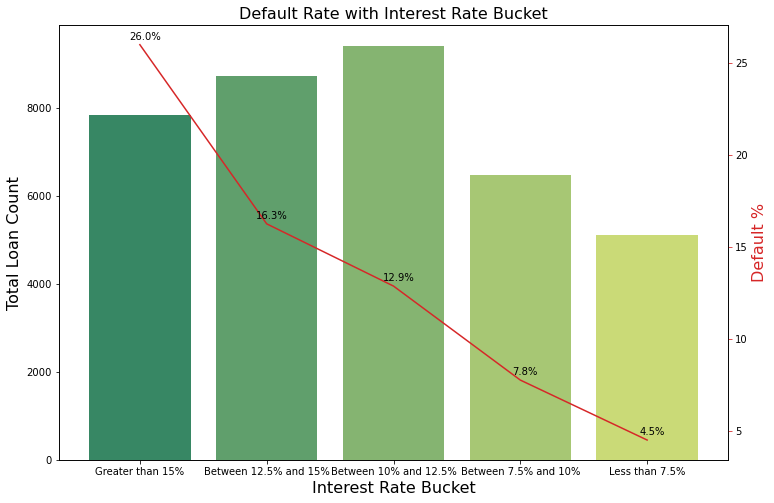

In [1837]:
# plot the graph
comboplot_bar(int_rate_bucket_pvttable,'int_rate_bucket','default%',"Interest Rate Bucket","Total Loan Count","Default Rate with Interest Rate Bucket")


### Employement Length

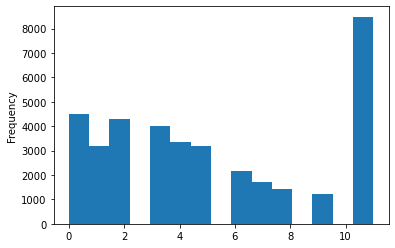

In [1768]:
df.emp_length.plot.hist(bins=15)
plt.show()

In [1770]:
#function to create bucket list for Employement lenght
def emp_length_bucket(exp):
    if exp in range (0,4):
        return "0-3 years"
    elif exp in range (4,7):
        return "4-6 years"
    elif exp in range (7,10):
        return "7-10 years"
    else:
        return "Greater than 10 years"

In [1826]:
#creating bucket for interest rate
df['emp_length_bucket']=df['emp_length'].apply(emp_length_bucket)
df[['emp_length_bucket','emp_length']].head()

,emp_length_bucket,emp_length
0,Greater than 10 years,11
1,0-3 years,0
2,Greater than 10 years,11
3,Greater than 10 years,11
5,0-3 years,3


In [1838]:
#pivot table for employment length bins wrt Default
emp_length_bucket_pvttable=create_pivot_table(df,["emp_length_bucket"],"id", ["default"],'count')
emp_length_bucket_pvttable

default,emp_length_bucket,0,1,default%,paid%,total
3,Greater than 10 years,7157,1331,15.680961,84.319039,8488
2,7-10 years,3748,624,14.272644,85.727356,4372
1,4-6 years,7477,1227,14.096967,85.903033,8704
0,0-3 years,13763,2217,13.873592,86.126408,15980


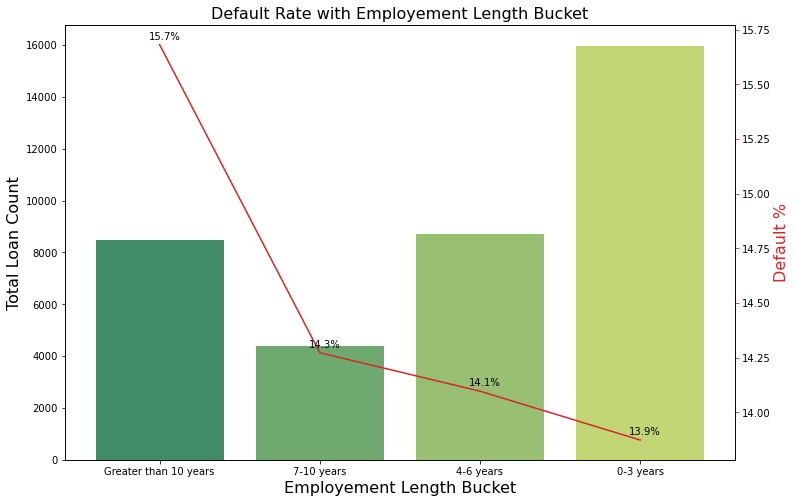

In [1839]:
# plot the graph
comboplot_bar(emp_length_bucket_pvttable,'emp_length_bucket','default%',"Employement Length Bucket","Total Loan Count","Default Rate with Employement Length Bucket")

### Borrower Annual Income 

In [1795]:
# Annual Income
df['annual_inc'].describe()

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

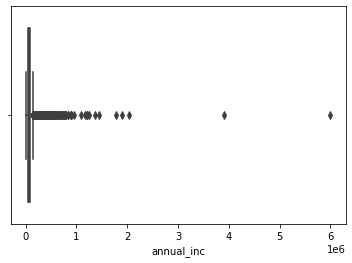

In [1806]:
sns.boxplot(df.annual_inc)
plt.show()

#### Most of Income group lies between 4k - 100k

In [1812]:
#function to create bucket list for Employement lenght
def annual_income_bucket(income):
    if 4000<=income<20000:
        return "4k-20k Income Group"
    elif 20000<=income<50000:
        return "20k - 50k Income Group"
    elif 50000<=income<80000:
        return "50k - 80k years"
    elif 80000<=income>110000:
        return "80k - 110k Income Group"
    else:
        return "Greater than 110k Income Group"

In [1829]:
df['annual_income_group']=df['annual_inc'].apply(annual_income_bucket)
df[['annual_income_group','annual_inc']].head()

,annual_income_group,annual_inc
0,20k - 50k Income Group,24000.0
1,20k - 50k Income Group,30000.0
2,4k-20k Income Group,12252.0
3,20k - 50k Income Group,49200.0
5,20k - 50k Income Group,36000.0


In [1840]:
#pivot table for employment length bins wrt Default
annual_income_group_pvttable=create_pivot_table(df,["annual_income_group"],"id", ["default"],'count')
annual_income_group_pvttable

default,annual_income_group,0,1,default%,paid%,total
1,4k-20k Income Group,710,183,20.492721,79.507279,893
0,20k - 50k Income Group,10679,2097,16.413588,83.586412,12776
2,50k - 80k years,11428,1921,14.390591,85.609409,13349
4,Greater than 110k Income Group,5571,737,11.683576,88.316424,6308
3,80k - 110k Income Group,3757,461,10.929350,89.070650,4218


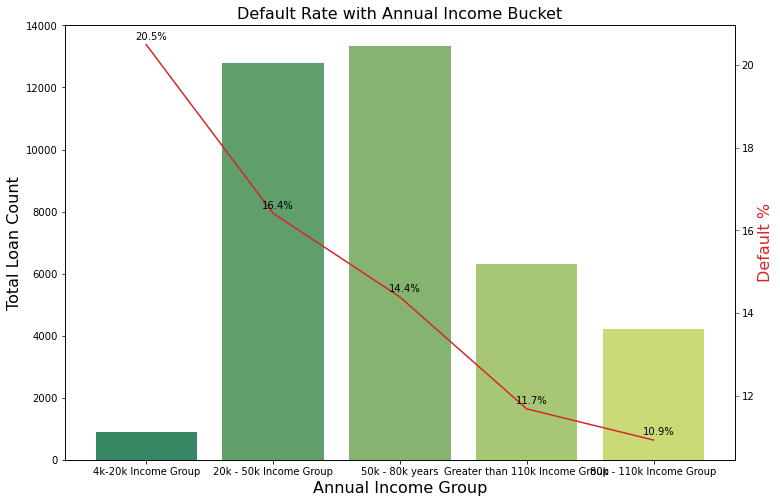

In [1841]:
# plot the graph
comboplot_bar(annual_income_group_pvttable,'annual_income_group','default%',"Annual Income Group","Total Loan Count","Default Rate with Annual Income Bucket")

#### Low Earning Borrower are most likely to be default

## Bivariate Analysis

### Grade - Term

In [1866]:
# bivariate bar plot function
def bivariate_barplot(x,y,hue,df,title,xlabel,ylabel,loc ="upper center",height=12,width=8):
    plt.figure(figsize=(height,width))
    sns.barplot(x=x, y=y, hue=hue, data=df)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.legend( loc=loc) 
    
    plt.show()

In [1867]:
#
grade_term_pvtTable=create_pivot_table(df,['grade','term'],"id",['default'],"count")
grade_term_pvtTable

default,grade,term,0,1,default%,paid%,total
12,G,36,35,21,37.500000,62.500000,56
11,F,60,494,258,34.308511,65.691489,752
13,G,60,163,79,32.644628,67.355372,242
9,E,60,1235,528,29.948951,70.051049,1763
7,D,60,1288,521,28.800442,71.199558,1809
10,F,36,152,55,26.570048,73.429952,207
5,C,60,1555,483,23.699706,76.300294,2038
8,E,36,685,172,20.070012,79.929988,857
3,B,60,1851,422,18.565772,81.434228,2273
6,D,36,2606,564,17.791798,82.208202,3170


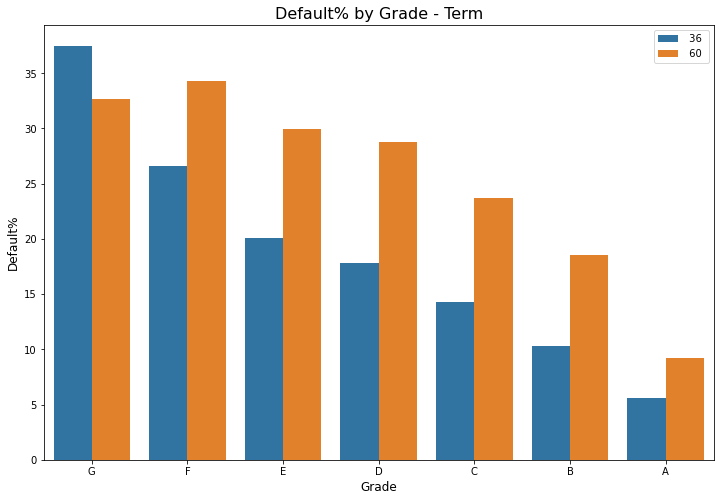

In [1868]:
bivariate_barplot('grade','default%',"term",grade_term_pvtTable,'Default% by Grade - Term','Grade','Default%',"upper right")

### Grade - Interest rate Bucket

In [1869]:

grade_int_rate_bucket_pvtTable=create_pivot_table(df,['grade','int_rate_bucket'],"id",['default'],"count")
grade_int_rate_bucket_pvtTable

default,grade,int_rate_bucket,0,1,default%,paid%,total
10,D,Between 10% and 12.5%,22.0,14.0,38.888889,61.111111,36.0
18,G,Greater than 15%,198.0,100.0,33.557047,66.442953,298.0
17,F,Greater than 15%,646.0,313.0,32.638165,67.361835,959.0
15,E,Greater than 15%,1877.0,687.0,26.794072,73.205928,2564.0
14,E,Between 12.5% and 15%,41.0,13.0,24.074074,75.925926,54.0
12,D,Greater than 15%,2659.0,811.0,23.371758,76.628242,3470.0
8,C,Greater than 15%,415.0,124.0,23.005566,76.994434,539.0
6,C,Between 10% and 12.5%,456.0,112.0,19.718310,80.281690,568.0
11,D,Between 12.5% and 15%,1209.0,260.0,17.699115,82.300885,1469.0
7,C,Between 12.5% and 15%,5506.0,1052.0,16.041476,83.958524,6558.0


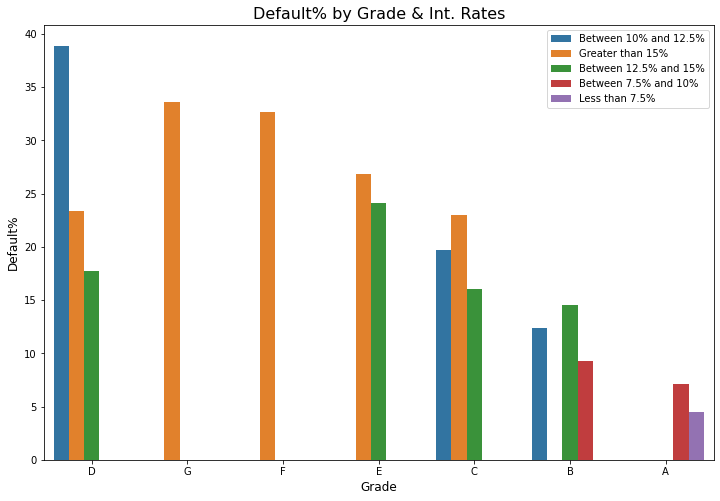

In [1870]:
bivariate_barplot('grade','default%',"int_rate_bucket",grade_int_rate_bucket_pvtTable,'Default% by Grade & Int. Rates','Grade','Default%',"upper right")

### Grade - Home ownership

In [1871]:
grade_home_ownership_pvtTable=create_pivot_table(df,['grade','home_ownership'],"id",['default'],"count")
grade_home_ownership_pvtTable.head()

default,grade,home_ownership,0,1,default%,paid%,total
27,G,OWN,10.0,11.0,52.380952,47.619048,21.0
23,F,OTHER,1.0,1.0,50.000000,50.000000,2.0
24,F,OWN,37.0,22.0,37.288136,62.711864,59.0
28,G,RENT,86.0,48.0,35.820896,64.179104,134.0
25,F,RENT,295.0,143.0,32.648402,67.351598,438.0


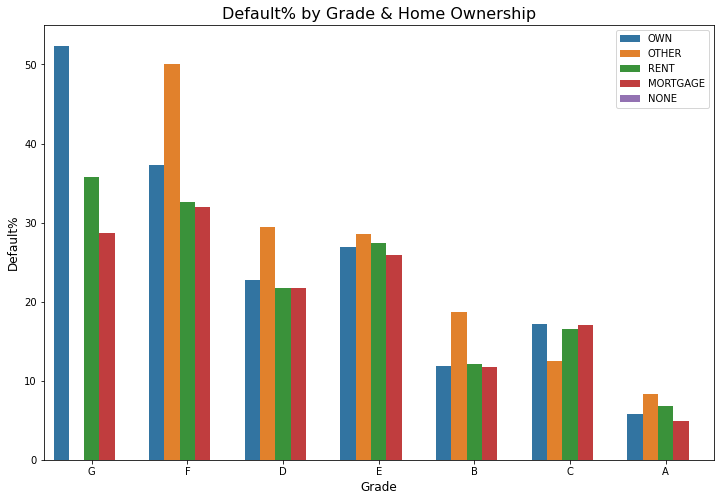

In [1872]:
bivariate_barplot('grade','default%',"home_ownership",grade_home_ownership_pvtTable,'Default% by Grade & Home Ownership','Grade','Default%','upper right')


### Loan Amount Bucket - Grade

In [1873]:

loan_amount_bucket_grade_pvtTable=create_pivot_table(df,['loan_amnt_bucket','grade'],"id",['default'],"count")
loan_amount_bucket_grade_pvtTable.head()

default,loan_amnt_bucket,grade,0,1,default%,paid%,total
27,Less than 5000,G,6,6,50.000000,50.000000,12
6,Between 10000 and 15000,G,23,18,43.902439,56.097561,41
13,Between 5000 and 10000,G,16,11,40.740741,59.259259,27
19,Greater than 15000,F,387,213,35.500000,64.500000,600
12,Between 5000 and 10000,F,83,41,33.064516,66.935484,124


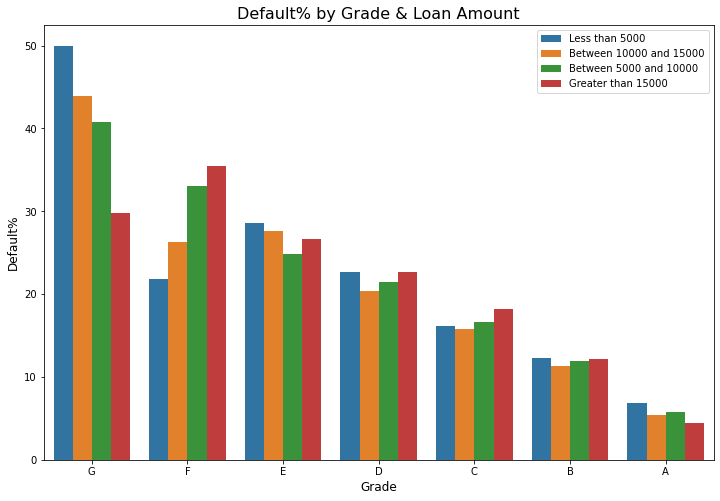

In [1874]:
bivariate_barplot('grade','default%',"loan_amnt_bucket",loan_amount_bucket_grade_pvtTable,'Default% by Grade & Loan Amount','Grade','Default%','upper right')


### Term - Home Ownership

In [1875]:
# term -home ownership pivot table
term_home_ownership_pvtTable=create_pivot_table(df,['term','home_ownership'],"id",['default'],"count")
term_home_ownership_pvtTable.head()

default,term,home_ownership,0,1,default%,paid%,total
8,60,RENT,2681.0,1035.0,27.852530,72.147470,3716.0
7,60,OWN,457.0,174.0,27.575277,72.424723,631.0
5,60,MORTGAGE,3793.0,1116.0,22.733754,77.266246,4909.0
2,36,OTHER,80.0,17.0,17.525773,82.474227,97.0
4,36,RENT,12661.0,1701.0,11.843754,88.156246,14362.0


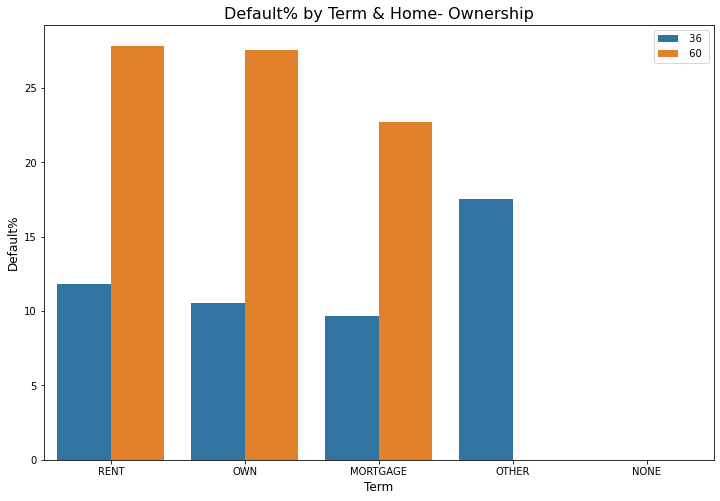

In [1876]:
#plot the graph
bivariate_barplot('home_ownership','default%',"term",term_home_ownership_pvtTable,'Default% by Term & Home- Ownership','Term','Default%','upper right')


### Grade - Employement Length

In [1878]:
# term -home ownership pivot table
grade_emp_length_pvtTable=create_pivot_table(df,['grade','emp_length'],"id",['default'],"count")
grade_emp_length_pvtTable.head()

default,grade,emp_length,0,1,default%,paid%,total
67,G,1,5,12,70.588235,29.411765,17
64,F,9,10,10,50.000000,50.000000,20
62,F,7,29,20,40.816327,59.183673,49
69,G,3,22,14,38.888889,61.111111,36
65,F,11,153,94,38.056680,61.943320,247


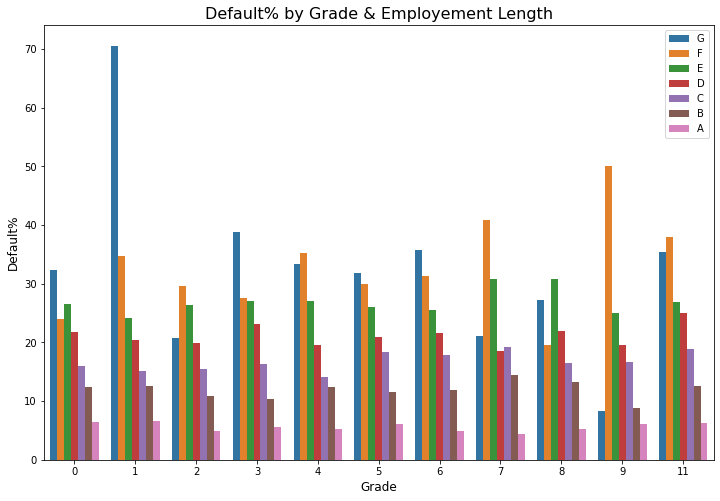

In [1879]:
#plot the graph
bivariate_barplot('emp_length','default%',"grade",grade_emp_length_pvtTable,'Default% by Grade & Employement Length','Grade','Default%','upper right')


In [ ]:
# Grade, Emp Lenght, Home ownership, sub grade,